In [26]:
#импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle

In [27]:
#загрузка данных
df_merged = pd.read_excel("../Data/ds_merged.xlsx ")
df_merged = df_merged.drop(['Unnamed: 0'], axis =1)

df_initial = pd.read_excel("../Data/ds_initial.xlsx ")
df_initial = df_initial.drop(['Unnamed: 0'], axis =1)

df_generated = pd.read_excel("../Data/ds_generated.xlsx ")
df_generated = df_generated.drop(['Unnamed: 0'], axis =1)

In [28]:
#менять датасет тут
df = df_merged

X=df.iloc[:,:4].to_numpy()
y=df.iloc[:,4:].to_numpy()


In [29]:

def plot_result(y_train,y_train_pred, y_test, y_pred):
    fig,axs = plt.subplots(figsize=(16,4), ncols=3)
    axs[0].scatter(y_train, y_train_pred)
    axs[0].set_title('train data')

    axs[1].scatter(y_pred, y_test, label="test data")
    axs[1].set_title('test data')
    err=y_pred - y_test
    axs[2].scatter(err[:,0], err[:,1], label="error")
    axs[2].set_title('error (test)')

    print('mse', mean_squared_error(y_test,y_pred))
    print('mae', mean_absolute_error(y_test,y_pred))
    print('Coef of determination', r2_score(y_test,y_pred))
    #reg.score(X_test, y_test)

    #((y_test-y_pred) ** 2).mean()

In [30]:
from sklearn.ensemble import RandomForestRegressor
with open('../Saved models/rf_model_pkl.pkl', 'rb') as f:
    model = pickle.load(f, )

mse 0.005036540668760902
mae 0.050294112615585654
Coef of determination 0.9109024739572591


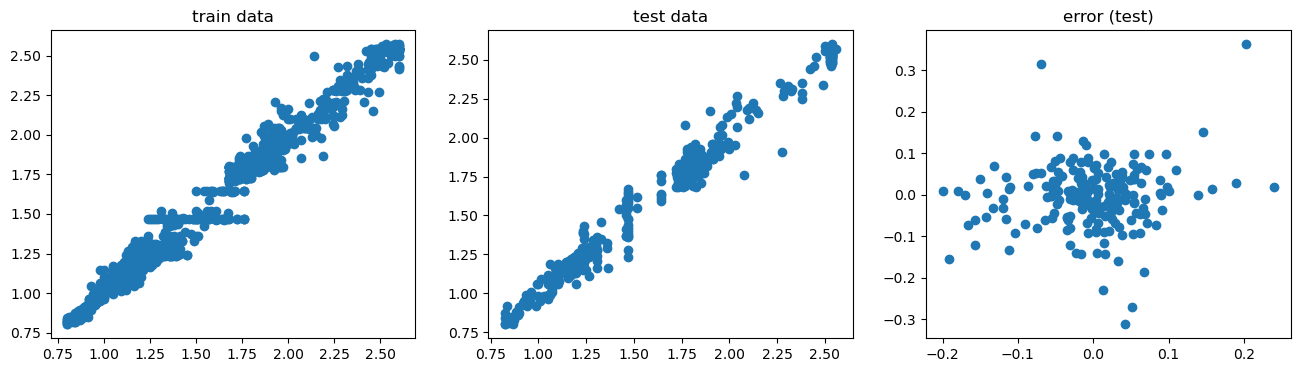

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state = 448)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)

